In [322]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import tree
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import decomposition
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn. model_selection import RandomizedSearchCV
from sklearn. model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

 ## NOMOR 1

In [3]:
df = pd.read_csv('C:\\Users\\ASUS\\Desktop\\nba_players.csv')

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0
11141,11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,0
11142,11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0
11143,11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,0


In [5]:
df_new = pd.read_csv('C:\\Users\\ASUS\\Desktop\\new_players.csv')

In [6]:
df_new

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [7]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season',
       'potential_player'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [11]:
df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

> ## Dilihat dari info, tidak ada data yang null, sehingga disini saya tidak melakukan dealing with missing value

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11145.0,5572.000000,3217.428709,0.000000,2786.0000,5572.00000,8358.000000,11144.00000
Unnamed: 0.1,11145.0,5572.000000,3217.428709,0.000000,2786.0000,5572.00000,8358.000000,11144.00000
age,11145.0,27.168686,4.344164,18.000000,24.0000,27.00000,30.000000,44.00000
player_height,11145.0,200.812818,9.190973,160.020000,195.5800,200.66000,208.280000,231.14000
player_weight,11145.0,100.637868,12.576295,60.327736,90.7184,99.79024,109.315672,163.29312
gp,11145.0,52.005832,25.069495,1.000000,32.0000,58.00000,74.000000,85.00000
pts,11145.0,8.126487,5.935482,0.000000,3.5000,6.60000,11.500000,36.10000
reb,11145.0,3.560036,2.495394,0.000000,1.8000,3.00000,4.700000,16.30000
ast,11145.0,1.801463,1.789940,0.000000,0.6000,1.20000,2.400000,11.70000
net_rating,11145.0,-2.153899,12.150611,-200.000000,-6.3000,-1.30000,3.200000,300.00000


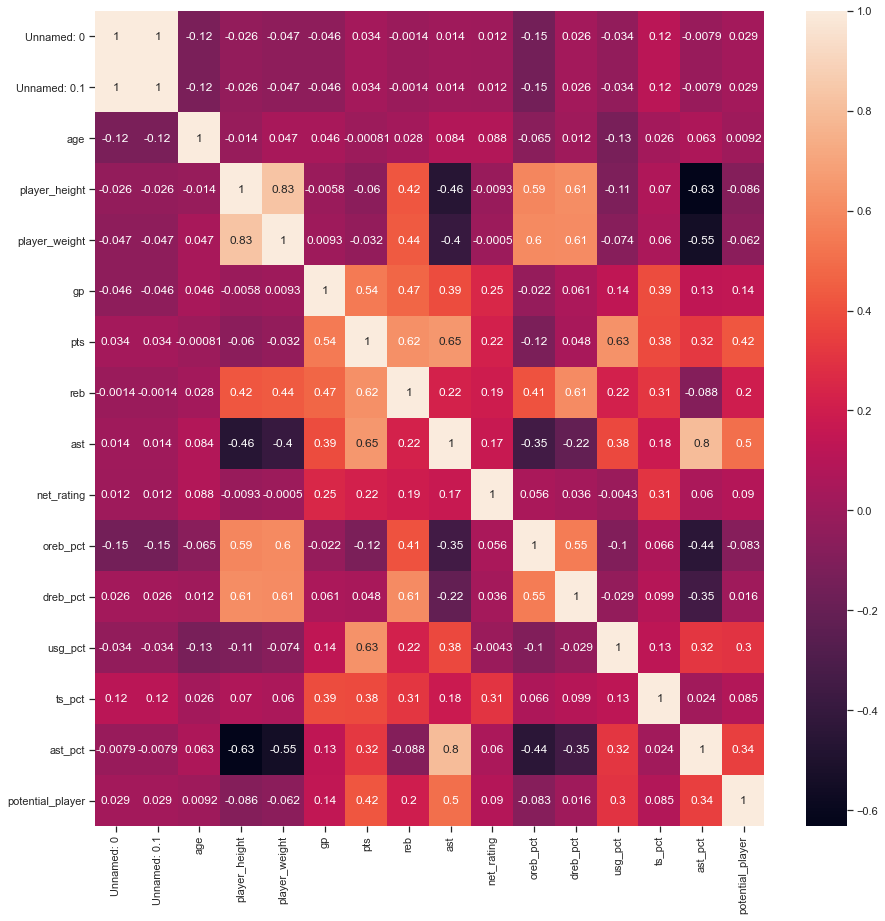

In [190]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method = 'pearson'), annot=True)

In [18]:
df['potential_player']

0        0
1        0
2        0
3        0
4        0
        ..
11140    0
11141    0
11142    0
11143    0
11144    0
Name: potential_player, Length: 11145, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

## NOMOR 2

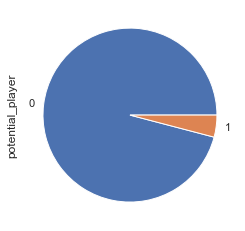

In [37]:
df.potential_player.value_counts(normalize = True). plot(kind='pie')
plt.show()

> ## Dari persebaran diatas, banyak pemain yang sudah tidak berpotensi dibandingkan yang berpotensi

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


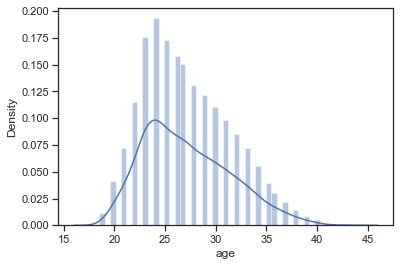

In [191]:
sns.distplot(df['age'])
plt.show()

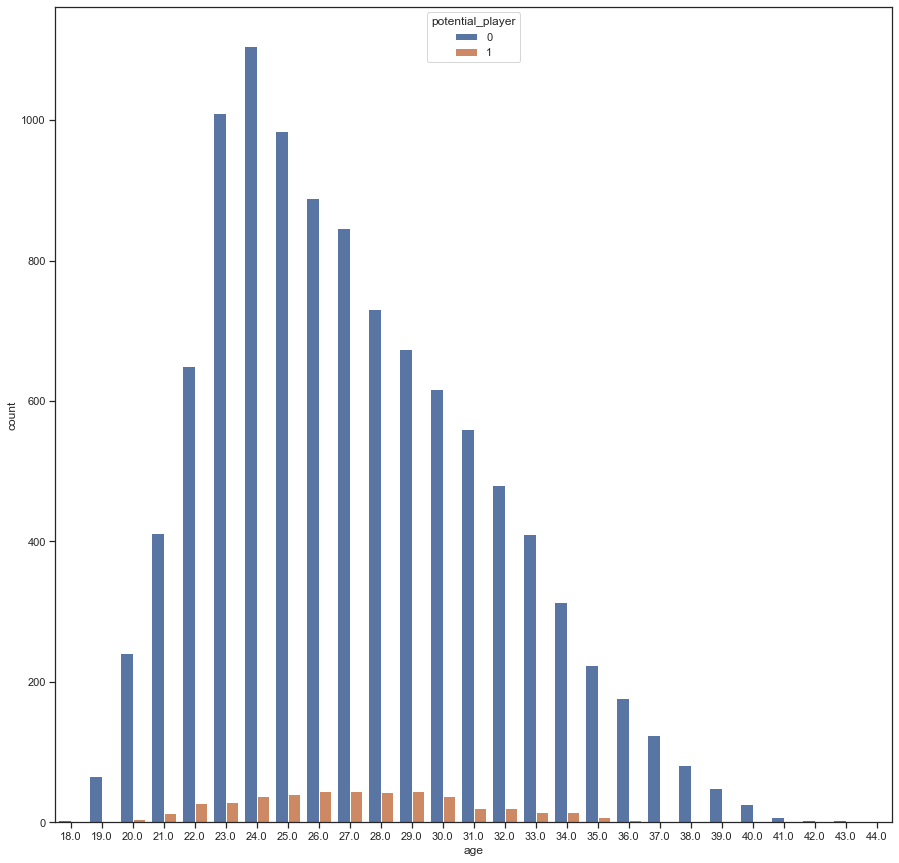

In [29]:
plt.figure(figsize=(15,15))
sns.countplot(x='age', hue='potential_player', data=df)
plt.show()

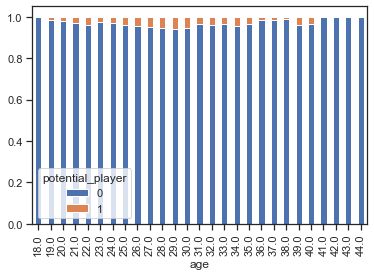

In [27]:
pd.crosstab(df['age'], df['potential_player'], normalize=0).plot(kind = 'bar', stacked=True)

> ## Dilihat dari grafik diatas, bahwa pemain yang berpotrnsi berada di umur 19 - 40 tahun, dan paling banyak berada di umur 27 - 31 tahun

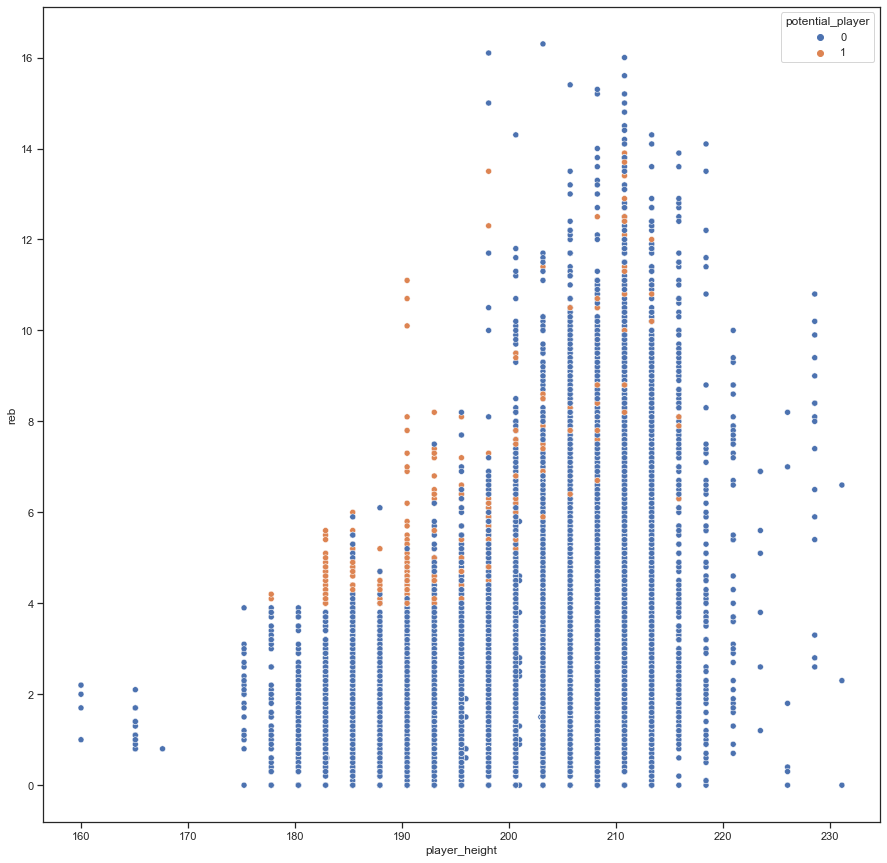

In [42]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='player_height', y='reb',hue = 'potential_player', data=df)
plt.show()

> ## Dari data diatas, pemain yang paling banyak melakukan rebound adalah pemain dengan tinggi 2- 2,1 meter

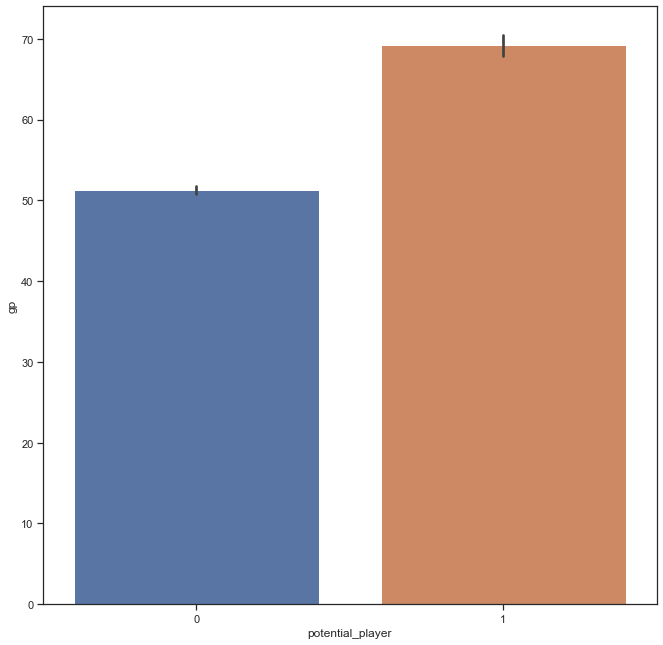

In [74]:
plt.figure(figsize=(11,11))
sns.barplot(x='potential_player', y='gp',data=df)
plt.show()

> ## pemain yang berpotensi memiliki jumlah bermain yang lebih baik dibandingkan dengan pemain yang tidak berpotensi, sehingga pemain berpotensi akan lebih sering dimainkan

In [238]:
#Masuk ke Nomor 1

a = df.drop(['potential_player', 'Unnamed: 0', 'Unnamed: 0.1','player_name', 'team_abbreviation', 'college','country','draft_year',
                     'draft_round','draft_number','season'], axis=1)
b = df['potential_player']

## NOMOR 3

## StandardScaller

In [239]:
scaller = StandardScaler()

scaller.fit(a)
scaled = scaller.transform(a)

In [240]:
Scaled_Nba = pd.DataFrame(scaled, columns=a.columns)
Scaled_Nba.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580


In [241]:
Scaled_Nba.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04,1.114500e+04
mean,1.333184e-15,7.602313e-16,9.394808e-16,-1.512772e-16,-5.350388e-16,3.388945e-17,-1.702143e-16,-1.877268e-17,1.374505e-16,1.233249e-16,3.667970e-16,9.702622e-16,5.060007e-17
std,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00,1.000045e+00
min,-2.110670e+00,-4.438556e+00,-3.205391e+00,-2.034669e+00,-1.369198e+00,-1.426707e+00,-1.006482e+00,-1.628354e+01,-1.266744e+00,-2.243532e+00,-3.498945e+00,-5.138828e+00,-1.379576e+00
25%,-7.294448e-01,-5.693688e-01,-7.887786e-01,-7.980508e-01,-7.794977e-01,-7.053455e-01,-6.712606e-01,-3.412411e-01,-7.654523e-01,-7.243380e-01,-6.711189e-01,-3.044193e-01,-6.954583e-01
50%,-3.883212e-02,-1.662774e-02,-6.740187e-02,2.391128e-01,-2.571915e-01,-2.244379e-01,-3.360389e-01,7.027934e-02,-2.869462e-01,-1.546400e-01,-6.784923e-02,1.304752e-01,-3.060376e-01
75%,6.517806e-01,8.124838e-01,6.900437e-01,8.773673e-01,5.683892e-01,4.568478e-01,3.344046e-01,4.406477e-01,6.928519e-01,6.366071e-01,6.108291e-01,4.945729e-01,4.938537e-01
max,3.874640e+00,3.299818e+00,4.982236e+00,1.316167e+00,4.713142e+00,5.105621e+00,5.530342e+00,2.486850e+01,2.151926e+01,1.358141e+01,1.535323e+01,1.003191e+01,9.145309e+00


In [242]:
Scaled_Nba['potential_player'] = df['potential_player']

In [243]:
Scaled_Nba.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264,0
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381,0
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107,0
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160,0
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580,0


## Train Test Split

In [244]:
X = Scaled_Nba.drop(['potential_player'], axis = 1)
y = Scaled_Nba['potential_player']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 1510)

## NOMOR 4 DAN 5

## Cross Validation

> ## Model yang saya pakai adalah Logistic Regression dan Decision Tree

> ## Logistic Regression

In [246]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [463]:
skfold = StratifiedKFold(n_splits = 5, random_state=1510, shuffle=True)

> ## DTC

In [464]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

> ## CV Score

In [465]:
logreg_cv_score = np.mean(cross_val_score(logreg, X_train, y_train, cv = skfold, scoring='precision'))
dtc_cv_score = np.mean(cross_val_score(dtc, X_train, y_train, cv = skfold, scoring='precision'))
print("Logistic Regression Score: ", logreg_cv_score)
print("DTC Score: ", dtc_cv_score)

Logistic Regression Score:  0.6977150853119075
DTC Score:  0.9624469410293048


## HYPERPARAMETER

> ## LOGISTIC REGRESSION

In [466]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1510,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [467]:
hyperparam_space = {
     'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

In [468]:
logreg = LogisticRegression(solver='liblinear', random_state=1510)

grid_search_logreg = GridSearchCV(
    logreg, # model
    param_grid = hyperparam_space,
    cv = skfold,
    scoring='precision',
    n_jobs=-1,
    verbose = 1
)

In [469]:
grid_search_logreg.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   10.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=LogisticRegression(random_state=1510,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='precision', verbose=1)

In [470]:
print('best score', grid_search_logreg.best_score_)
print('best params', grid_search_logreg.best_params_)

best score 0.7855454970461982
best params {'C': 0.005, 'max_iter': 100}


In [471]:
logreg_grid = grid_search_logreg.best_estimator_

In [472]:
logreg_grid_pred = logreg_grid.predict(X_test)
logreg_grid_proba = logreg_grid.predict_proba(X_test)

In [473]:
logreg_grid_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [474]:
print(classification_report(y_test, logreg_grid_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2138
           1       0.69      0.22      0.33        91

    accuracy                           0.96      2229
   macro avg       0.83      0.61      0.66      2229
weighted avg       0.96      0.96      0.96      2229



> ## DECISION TREE

In [475]:
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10,20],
}
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, scoring='precision', cv=skfold, n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='precision')

In [476]:
print('best score', grid_search_dtc.best_score_)
print('best params', grid_search_dtc.best_params_)

best score 0.991777693186144
best params {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [477]:
grid_search_dtc.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

In [478]:
dtc_grid = grid_search_dtc.best_estimator_

In [479]:
dtc_grid_pred = dtc_grid.predict(X_test)
dtc_grid_proba = dtc_grid.predict_proba(X_test)

In [480]:
dtc_grid_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [481]:
print(classification_report(y_test, dtc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      0.97      0.98        91

    accuracy                           1.00      2229
   macro avg       1.00      0.98      0.99      2229
weighted avg       1.00      1.00      1.00      2229



In [482]:
logreg_prob = logreg_grid.predict_proba(X_test)
logregprob = logreg_prob[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, logregprob)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

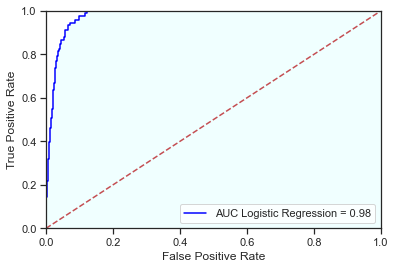

In [483]:
plt.plot(fpr_logreg, tpr_logreg, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='azure', alpha=1)
plt.legend()

In [484]:
dtc_prob = dtc_grid.predict_proba(X_test)
dtcprob = dtc_prob[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, dtcprob)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

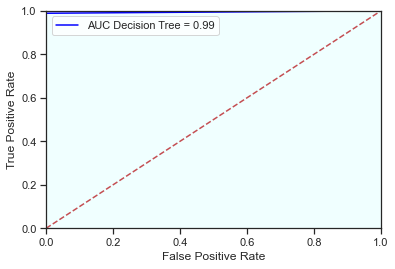

In [485]:
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend()

In [486]:
cc= pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, dtc_grid_pred),precision_score(y_test, dtc_grid_pred),recall_score(y_test, dtc_grid_pred),f1_score(y_test, dtc_grid_pred)],
    "Logistic Regression": [accuracy_score(y_test, logreg_grid_pred),precision_score(y_test, logreg_grid_pred),recall_score(y_test, logreg_grid_pred),f1_score(y_test, logreg_grid_pred)]
}, index=['Accuracy', 'Precision', 'Recall', 'F1'])
cc

,Decision Tree,Logistic Regression
Accuracy,0.998654,0.964109
Precision,1.000000,0.689655
Recall,0.967033,0.219780
F1,0.983240,0.333333


Dari nilai diatas, Model Decision Tree mempunyai nilai Precision lebih baik dibandingkan dengan model Logistic Regression, dan dari grafik AUC, nilai Decision Tree lebih baik dibandingkan dengan nilai Logistic Regression, karena tim kita sedang dilanda krisis keuangan, maka kita mengurangi nilai false negatif dan menggunakan nilai dari precision score

> ## Mencoba Menggunakan SMOTE

In [487]:
sm = SMOTE(random_state=1510, sampling_strategy=1.0, k_neighbors=5)
Xsmot_train, ysmot_train = sm.fit_sample(X_train, y_train)

In [488]:
grid_search_logregsmot = GridSearchCV(estimator=logreg, param_grid=hyperparam_space, scoring='precision', cv=skfold, n_jobs=-1)
grid_search_logregsmot.fit(Xsmot_train, ysmot_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=LogisticRegression(random_state=1510,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='precision')

In [489]:
logregsmot = grid_search_logregsmot.best_estimator_
logregsmot

LogisticRegression(C=1, random_state=1510, solver='liblinear')

In [490]:
logregsmot_pred = logregsmot.predict(X_test)
logregsmot_proba = logregsmot.predict_proba(X_test)

In [491]:
print(classification_report(y_test, logregsmot_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2138
           1       0.39      0.93      0.55        91

    accuracy                           0.94      2229
   macro avg       0.69      0.94      0.76      2229
weighted avg       0.97      0.94      0.95      2229



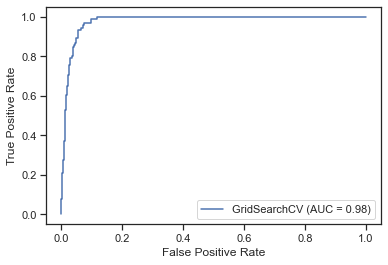

In [492]:
plot_roc_curve(grid_search_logregsmot, X_test, y_test)

Setelah melakukan SMOTE, nilai Logistic Regression mengalami perubahan di recall menjadi 0.93 dan nilai AUC 0.98

In [493]:
grid_search_dtcsmot = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, scoring='precision', cv=skfold, n_jobs=-1)
grid_search_dtcsmot.fit(Xsmot_train, ysmot_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='precision')

In [494]:
dtcsmot = grid_search_dtcsmot.best_estimator_

In [495]:
dtcsmot_pred = dtcsmot.predict(X_test)
dtcsmot_proba = dtcsmot.predict_proba(X_test)

In [496]:
print(classification_report(y_test, dtcsmot_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2138
           1       1.00      0.98      0.99        91

    accuracy                           1.00      2229
   macro avg       1.00      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229



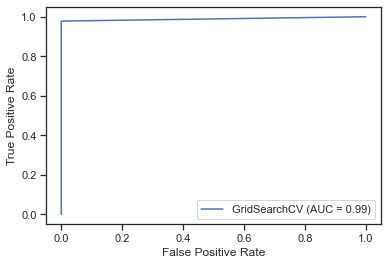

In [497]:
plot_roc_curve(grid_search_dtcsmot, X_test, y_test)

Untuk Decision Tree, setelah dilakukan SMOTE, score pada model ini tidak berubah dan nilau AUC tetap 0.99

## NOMOR 6

## Predict

In [498]:
pred_NBA = df_new.drop(['Prediksi', 'Status'], axis=1) #Sebelumnya setelah selesai saya kembali running bagian Hyperparam, sehingga untuk memulai lagi harus hapus kolom baru

In [500]:
pred_NBA.head()

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [501]:
X.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580


In [502]:
df_predict = pred_NBA.drop(['Unnamed: 0', 'player_id','college', 'country'], axis=1)
df_predict

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,21.0,195.58,99.790240,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,23.0,215.90,122.469840,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28.0,200.66,103.418976,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,28.0,200.66,107.047712,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,23.0,208.28,103.418976,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,24.0,213.36,108.862080,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [503]:
scaller.fit(df_predict)
predict_scaled = scaller.transform(df_predict)
dfScaled = pd.DataFrame(predict_scaled, columns=X.columns)
dfScaled.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.342023,0.499014,0.250921,0.664993,-0.895364,0.247934,-0.617326,-0.186725,0.684281,1.609449,-1.425465,-0.172796,-0.614537
1,1.391912,-4.394712,-2.945117,0.307769,-0.446118,-0.589963,2.243481,-0.458498,-0.821288,-1.175420,-1.137166,-0.143601,2.374878
2,-0.033254,-0.860354,-0.467290,-0.684522,1.733558,0.834461,2.121745,0.730509,-0.868337,0.191387,1.726603,0.119155,1.353041
3,-1.458420,-0.588480,-0.108185,-0.446372,-0.978558,-0.967016,-0.373853,-0.101796,-0.586043,-0.474931,-0.329929,-1.038917,0.526876
4,-0.983365,1.586509,1.687342,-1.081438,-0.845448,-0.087225,-0.860798,-0.407541,0.331414,1.336088,-1.463905,0.430569,-0.962396


In [504]:
player_pred = dtcsmot.predict(dfScaled)

In [505]:
pred_NBA['Prediksi'] = player_pred

In [506]:
pred_NBA

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Prediksi
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0


In [507]:
pred_NBA['Status']=pred_NBA.apply(lambda x: 'Rekrut' if (x['Prediksi']== 1) else 'Tidak', axis=1)
pred_NBA

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Prediksi,Status
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0,Tidak
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0,Tidak
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1,Rekrut
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0,Tidak
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0,Tidak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0,Tidak
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0,Tidak
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0,Tidak
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0,Tidak


hasil dari predict ini berupa array yang berisi 0 dan 1 dimana 0 merupakan pemain yang diprediksi tidak di rekrut dan 1 merupakan pemain yang diprediksi di rekrut